In [1]:
from datetime import date
import os
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap, ListedColormap
import matplotlib.colors as colors
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon
import rasterio
import plotly_express as  px

In [2]:
contour = gpd.read_file("data\kontur.gpkg")
health_facilities = gpd.read_file("data\health_facilities\hotosm_zaf_health_facilities_points.shp")

In [3]:
contour.head(9)

,admin_level,name,name_en,population,hasc,geometry
0,2,South Africa,South Africa,51919523.0,ZA,"MULTIPOLYGON (((16.33352 -28.80042, 16.41742 -..."
1,4,North West,None,3551807.0,ZA.NW,"MULTIPOLYGON (((22.62898 -26.10220, 22.62945 -..."
2,4,Northern Cape,None,1181628.0,ZA.NC,"MULTIPOLYGON (((16.33352 -28.80042, 16.41742 -..."
3,4,Limpopo,None,5280867.0,ZA.NP,"MULTIPOLYGON (((26.40754 -24.64938, 26.40765 -..."
4,4,Mpumalanga,Mpumalanga,4264311.0,ZA.MP,"MULTIPOLYGON (((28.24347 -26.87369, 28.24350 -..."
5,4,Eastern Cape,None,7561144.0,ZA.EC,"MULTIPOLYGON (((22.73574 -33.39477, 22.73575 -..."
6,4,Free State,Free State,2384103.0,ZA.FS,"MULTIPOLYGON (((24.34662 -29.65593, 24.34752 -..."
7,4,Western Cape,None,5898542.0,ZA.WC,"MULTIPOLYGON (((17.56879 -31.26797, 17.60908 -..."
8,4,KwaZulu-Natal,KwaZulu-Natal,10206624.0,ZA.NL,"MULTIPOLYGON (((28.87348 -28.77191, 28.87348 -..."


In [4]:
health_facilities.head(9)

,osm_id,building,capacitype,healthcare,operatorty,amenity,addrfull,source,name,healthca_1,addrcity,geometry
0,28234904.0,None,None,None,None,pharmacy,None,None,Van Heerden,None,None,POINT (28.29820 -25.76597)
1,29096036.0,None,None,maternity;radiology;emergency;pathology;psycho...,private,hospital,None,None,Bougainville Hospital,None,"Daspoort,Pretoria",POINT (28.15371 -25.71753)
2,29107059.0,None,None,adult,None,hospital,None,None,Weskoppies,None,None,POINT (28.16034 -25.76540)
3,50159939.0,None,None,hospital,None,hospital,None,None,Claremont Hospital,None,None,POINT (18.46654 -33.98661)
4,60482323.0,None,None,heart_and_lung_centre;paediatric_unit;uterine_...,None,hospital,None,None,UCT Private Academic Hospital,None,"Observatory,Cape Town",POINT (18.46331 -33.94205)
5,60631788.0,None,None,pharmacy,None,pharmacy,None,None,EL Burro Taqueria Kloof Nek,None,None,POINT (18.40824 -33.92978)
6,60696607.0,None,None,pharmacy,None,pharmacy,None,None,Clicks,None,None,POINT (18.43027 -34.13960)
7,210124444.0,None,None,None,None,pharmacy,None,None,Kloof Pharmacy,None,None,POINT (30.83290 -29.79234)
8,242958852.0,None,None,pharmacy,None,pharmacy,None,None,Mays Chemist,None,None,POINT (28.00083 -26.17672)


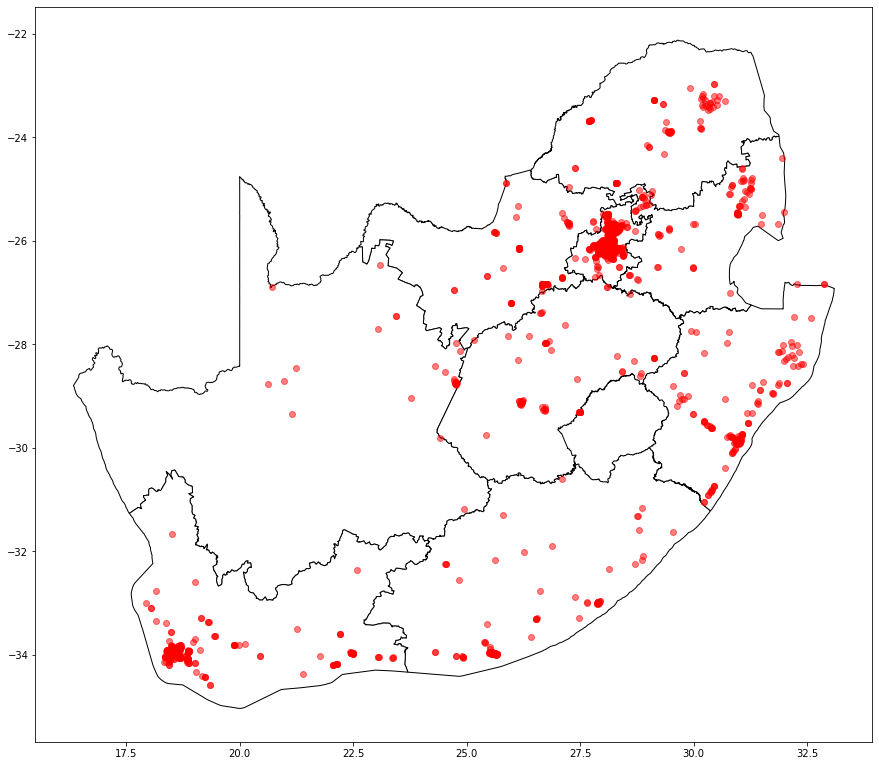

In [5]:
fig, gax =plt.subplots(figsize=(15,15))

contour.iloc[1:10].plot(ax = gax, edgecolor = 'black', color = 'white')
health_facilities.plot(ax = gax, color = 'red', alpha= 0.5)


plt.show()

In [6]:
contour_points = contour.iloc[0:10].copy()
contour_points.reset_index(inplace = True)
contour_points 
contour_points = contour_points.to_crs("EPSG:4326")
contour_points["geometry"] = contour["geometry"].centroid

 



C:\Users\Clinton\AppData\Local\Temp\ipykernel_11872\3857614364.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  contour_points["geometry"] = contour["geometry"].centroid


In [7]:

contour_points['population'] = contour_points['population'].astype('int')




In [8]:

Total = contour_points['population'].sum()
contour_points["percentile"] = ""

for pop in range(len(contour_points["population"])):
    #pop = pop + 1
    contour_points.percentile[pop] = contour_points.population[pop] / Total * 100
    #print(contour_points.population[pop])


C:\Users\Clinton\AppData\Local\Temp\ipykernel_11872\2424524908.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contour_points.percentile[pop] = contour_points.population[pop] / Total * 100


In [9]:
#contour_points = contour.iloc[1:9].copy()
contour_points = contour_points.to_crs("EPSG:4326")
contour_points["geometry"] = contour["geometry"].centroid

 

C:\Users\Clinton\AppData\Local\Temp\ipykernel_11872\4066058184.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  contour_points["geometry"] = contour["geometry"].centroid


In [10]:
contour_points["lat"] = contour_points.geometry.map(lambda p: p.x)
contour_points["long"] = contour_points.geometry.map(lambda p: p.y)

C:\Users\Clinton\AppData\Local\Temp\ipykernel_11872\2121711298.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contour_points.percentile[pop] = contour_points.population[pop] / Total * 1000
C:\Users\Clinton\AppData\Local\Temp\ipykernel_11872\2121711298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contour_points.percentile[pop] = contour_points.percentile[pop] * 100


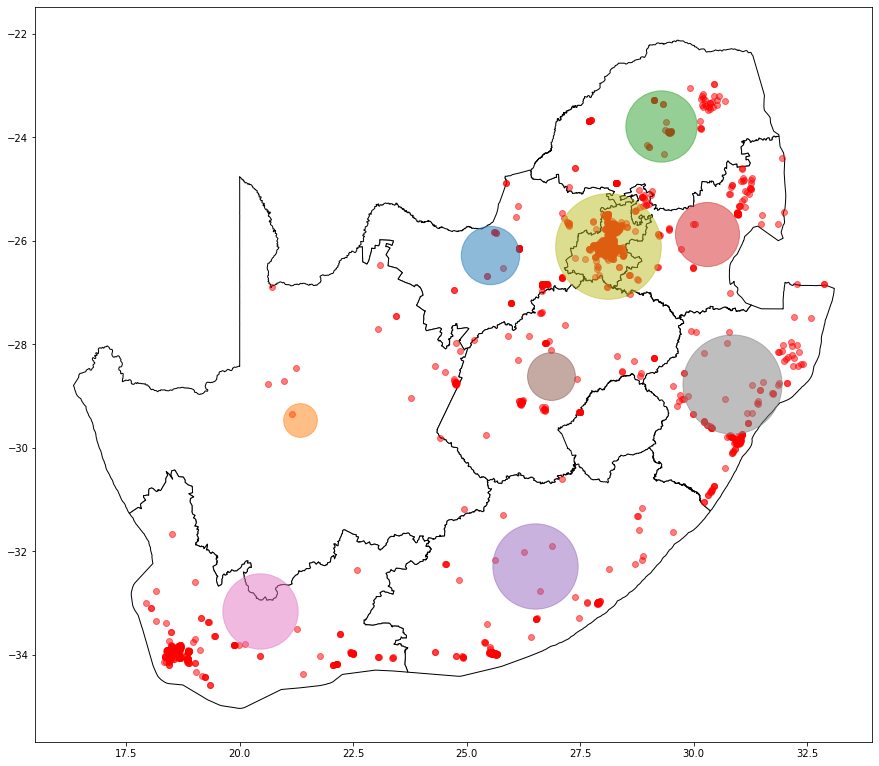

In [11]:
contour_points["lat"] = contour_points.geometry.map(lambda p: p.x)
contour_points["long"] = contour_points.geometry.map(lambda p: p.y)



Total = contour_points['population'].sum()
contour_points["percentile"] = ""


for pop in range(len(contour_points["population"])):
    contour_points.percentile[pop] = contour_points.population[pop] / Total * 1000
    
    
fig, gax =plt.subplots(figsize=(15,15))

contour.iloc[1:10].plot(ax = gax, edgecolor = 'black', color ='white')
health_facilities.plot(ax = gax, color = 'red', alpha= 0.5)


for pop in range(len(contour_points.iloc[1:10]["population"])):
    pop = pop + 1
    contour_points.percentile[pop] = contour_points.percentile[pop] * 100
    plt.scatter(contour_points.lat[pop],contour_points.long[pop], 
    s=contour_points.percentile[pop], alpha=0.5, cmap="Blues")


plt.show()


In [12]:

contourp = contour.iloc[1:10]
contourp.reset_index(inplace = True)
boolval = ""
health_facilities["province"] = ""
for hosp in range(len(health_facilities.geometry)):
    for prov in range(len(contourp.geometry)):
        if (health_facilities.geometry[hosp].within(contourp.geometry[prov])):
            health_facilities.province[hosp] = contourp.name[prov]
            
        
    
    
    
    

C:\Users\Clinton\AppData\Local\Temp\ipykernel_11872\2024753856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_facilities.province[hosp] = contourp.name[prov]


In [13]:
health_facilities.head()

,osm_id,building,capacitype,healthcare,operatorty,amenity,addrfull,source,name,healthca_1,addrcity,geometry,province
0,28234904.0,None,None,None,None,pharmacy,None,None,Van Heerden,None,None,POINT (28.29820 -25.76597),Gauteng
1,29096036.0,None,None,maternity;radiology;emergency;pathology;psycho...,private,hospital,None,None,Bougainville Hospital,None,"Daspoort,Pretoria",POINT (28.15371 -25.71753),Gauteng
2,29107059.0,None,None,adult,None,hospital,None,None,Weskoppies,None,None,POINT (28.16034 -25.76540),Gauteng
3,50159939.0,None,None,hospital,None,hospital,None,None,Claremont Hospital,None,None,POINT (18.46654 -33.98661),Western Cape
4,60482323.0,None,None,heart_and_lung_centre;paediatric_unit;uterine_...,None,hospital,None,None,UCT Private Academic Hospital,None,"Observatory,Cape Town",POINT (18.46331 -33.94205),Western Cape


In [14]:
hosp_by_prov = health_facilities.groupby(['province']).count()
hosp_by_prov


,osm_id,building,capacitype,healthcare,operatorty,amenity,addrfull,source,name,healthca_1,addrcity,geometry
province,,,,,,,,,,,,
,19,0,0,13,0,19,0,4,17,0,0,19
Eastern Cape,98,0,0,63,7,92,0,0,82,0,23,98
Free State,50,0,0,23,9,48,0,1,46,0,18,50
Gauteng,752,0,0,589,200,727,0,8,669,0,379,752
KwaZulu-Natal,127,0,0,61,18,125,0,2,109,0,22,127
Limpopo,93,0,0,75,23,88,0,0,86,0,48,93
Mpumalanga,86,0,0,55,12,85,0,0,75,0,22,86
North West,81,3,0,66,7,71,0,1,70,0,16,81
Northern Cape,27,0,0,22,3,27,0,1,19,0,12,27


In [15]:

health_facilities.province.dropna()

0             Gauteng
1             Gauteng
2             Gauteng
3        Western Cape
4        Western Cape
            ...      
1607     Eastern Cape
1608     Eastern Cape
1609    KwaZulu-Natal
1610    KwaZulu-Natal
1611          Gauteng
Name: province, Length: 1612, dtype: object

In [16]:

health_facilities = health_facilities.drop(health_facilities[health_facilities.province == ""].index)

In [17]:
hosp_count = health_facilities["province"].value_counts()
hosp_count

Gauteng          752
Western Cape     279
KwaZulu-Natal    127
Eastern Cape      98
Limpopo           93
Mpumalanga        86
North West        81
Free State        50
Northern Cape     27
Name: province, dtype: int64

In [18]:
pop_sorted = contourp.sort_values(by=["population"])
pop_sorted

,index,admin_level,name,name_en,population,hasc,geometry
1,2,4,Northern Cape,None,1181628.0,ZA.NC,"MULTIPOLYGON (((16.33352 -28.80042, 16.41742 -..."
5,6,4,Free State,Free State,2384103.0,ZA.FS,"MULTIPOLYGON (((24.34662 -29.65593, 24.34752 -..."
0,1,4,North West,None,3551807.0,ZA.NW,"MULTIPOLYGON (((22.62898 -26.10220, 22.62945 -..."
3,4,4,Mpumalanga,Mpumalanga,4264311.0,ZA.MP,"MULTIPOLYGON (((28.24347 -26.87369, 28.24350 -..."
2,3,4,Limpopo,None,5280867.0,ZA.NP,"MULTIPOLYGON (((26.40754 -24.64938, 26.40765 -..."
6,7,4,Western Cape,None,5898542.0,ZA.WC,"MULTIPOLYGON (((17.56879 -31.26797, 17.60908 -..."
4,5,4,Eastern Cape,None,7561144.0,ZA.EC,"MULTIPOLYGON (((22.73574 -33.39477, 22.73575 -..."
7,8,4,KwaZulu-Natal,KwaZulu-Natal,10206624.0,ZA.NL,"MULTIPOLYGON (((28.87348 -28.77191, 28.87348 -..."
8,9,4,Gauteng,Gauteng,11590477.0,ZA.GT,"MULTIPOLYGON (((27.15634 -26.52431, 27.17857 -..."


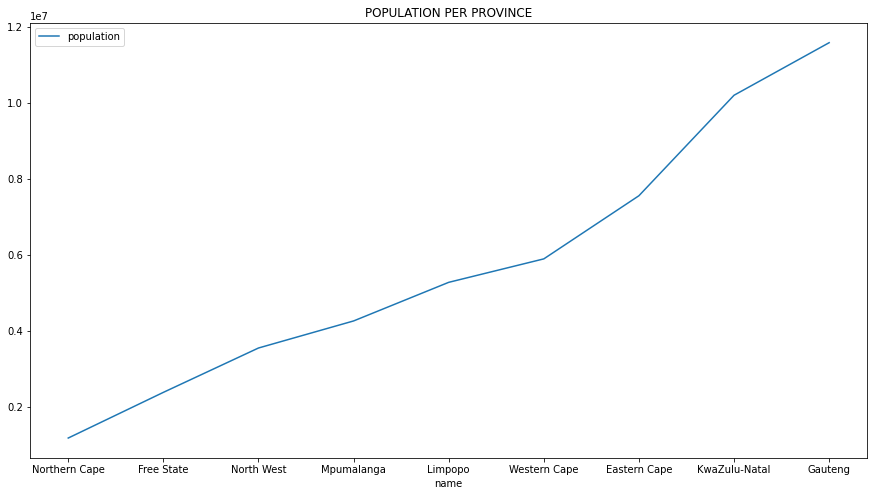

In [24]:

pop_sorted.plot(figsize = (15, 8),kind='line' , x='name', y = "population", title = "POPULATION PER PROVINCE");

<AxesSubplot:title={'center':'HOSPITAL PER PROVINCE'}>

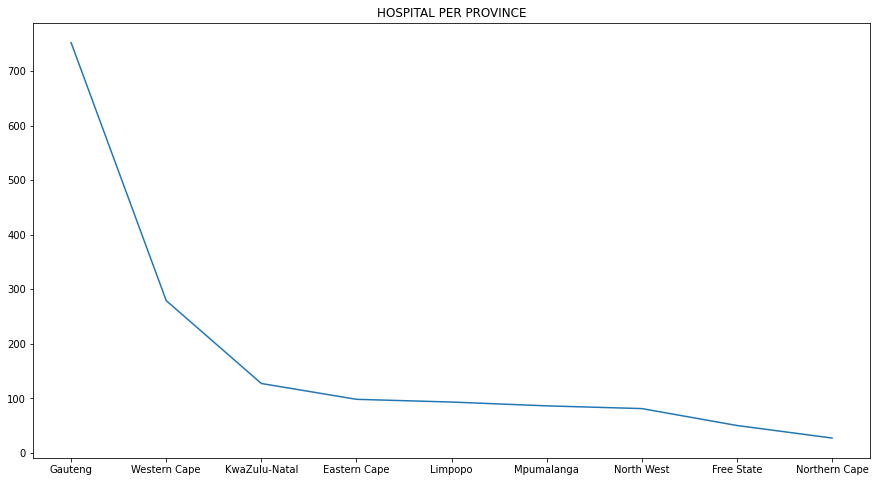

In [22]:
hosp_count.plot(figsize = (15, 8), kind='line', title = "HOSPITAL PER PROVINCE")